# Gradient descent principles
#### Flàvia Ferrús and David Rosado

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **1.Gradient descent methods**

### 1.1. A simple quadratic function

We begin with a simple two-dimensional function, namely $f(x_1,x_2)=x_1^2+x_2^2$. Let us plot the function to get familiarize with it.

In [2]:
def f(x,y):
    return x**2 + y**2

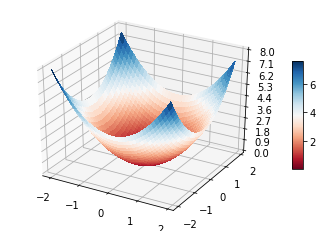

In [3]:
#Plot of the function
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib import cm
import pylab

x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

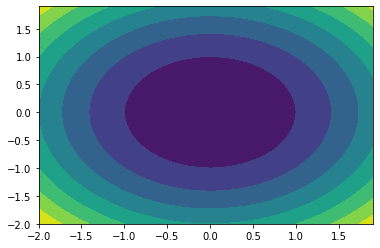

In [4]:
#Contour plot
fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

We begin some experiments with gradient descent using a constant step
\begin{align*}
\textbf{x}^{k+1}=\textbf{x}^k-\alpha^k\nabla f(\textbf{x}^k)
\end{align*}

#### 1.Implement the previous algorithm with a constant $\alpha^k=0.1$ parameter.

In [5]:
#We compute the gradient of the function
def grad_f(x,y):
  return np.array([2*x, 2*y])

In [6]:
# Compute the gradient descent method for a given initial point and number of steps
def gradDescent( x0, steps, alpha = 0.1):
    x_path=np.zeros(steps)
    y_path=np.zeros(steps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    for i in range(1,steps):
        x_k = x_0-alpha*grad_f(x_0[0],x_0[1])
        x_0 = x_k
        x_path[i]=x_k[0]
        y_path[i]=x_k[1]
    return x_path, y_path

In [7]:
#Function that plots the path of gradient descent for a given initial point and number of steps    
def plotGradients(x0, steps, x_path, y_path, f=f, alpha=0.1):
    x_limit = x0[0]
    y_limit= x0[1]
    for i in range(len(x_path)):
        if x_limit < x_path[i]:
            x_limit = x_path[i]
        if y_limit < y_path[i]:
            y_limit = y_path[i]
    if abs(x_limit) <1.2 and abs(y_limit) < 1.2:
        x=np.arange(-1.5,1.5, 0.1)
        y=np.arange(-1.1,1.1, 0.1)
    elif abs(x_limit) <1.2:
        x=np.arange(-1.5,1.5, 0.1)
        y=np.arange(-abs(y_limit)-0.1,abs(y_limit)+0.1, 0.1)
    elif abs(y_limit) < 1.2:
        x=np.arange(-abs(x_limit)-0.1,abs(x_limit)+0.1, 0.1)
        y=np.arange(-1.1,1.1, 0.1)
    else: 
        x=np.arange(-abs(x_limit) -0.1,abs(x_limit)+0.1, 0.1)
        y=np.arange(-abs(y_limit)-0.1,abs(y_limit)+0.1, 0.1)
    X, Y = pylab.meshgrid(x,y)
    X, Y = pylab.meshgrid(x,y)
    Z= f(X,Y)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1], y_path[-1])
    #print(len(x_path))
    
def plotGrad(x0, steps, alpha =0.1):
    x_path, y_path = gradDescent(x0, steps, alpha)
    plotGradients(x0, steps, x_path, y_path, alpha=0.1)

Subsequently, we will see that the algorithm is always converging to the global minimum of the function, $(0,0)$. Let us draw the path
the gradient descent follows for each of the starting points $x_0$ we have studied.

2.5462949704181097e-10 5.092589940836219e-10


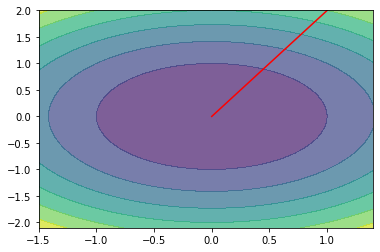

In [9]:
x_0 = [1,2]
plotGrad(x_0, 100)

We can now contrast different number of iterations and different starting points when considering the regular gradient descent method with constant step. 

Note that, evidently, the output is closer to the minimum when more iterations are considered and when the initial point is already closer to the extreme point we are seeking for, as would be expected by intuition. 

0.13421772800000004 0.26843545600000007


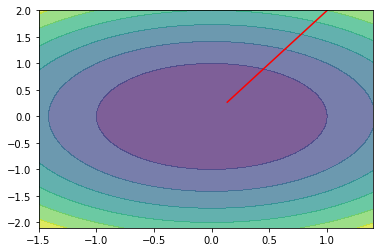

In [10]:
plotGrad([1,2], 10)

0.13421772800000004 0.13421772800000004


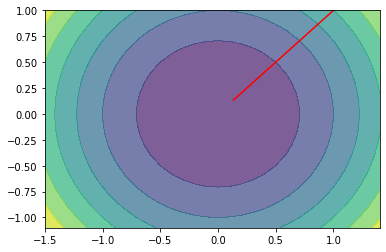

In [11]:
plotGrad([1,1], 10)

2.5462949704181097e-10 2.5462949704181097e-10


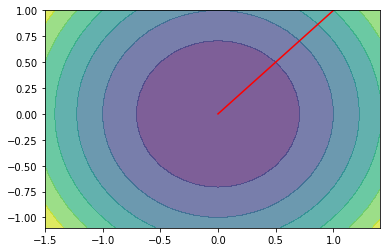

In [12]:
plotGrad([1,1], 100)

1.2731474852090548e-09 7.638884911254329e-10


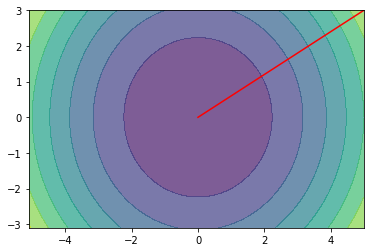

In [13]:
plotGrad([5,3], 100)

#### 2.Try other values of $\alpha$ such as $\alpha^k=1$ or $\alpha^k=2$.

-1.0 -2.0


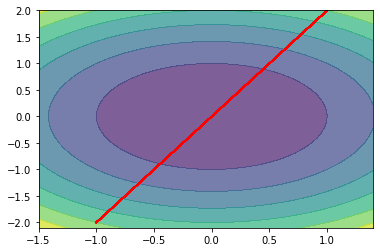

In [14]:
plotGrad([1,2], 100, alpha = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


9.948742818458484e+17 1.989748563691697e+18


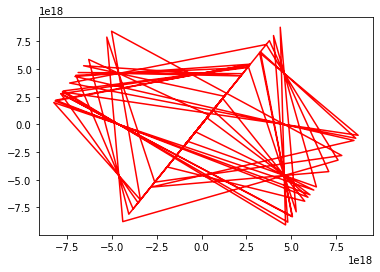

In [15]:
#plotGrad([1,2], 100, alpha = 2)
'''
    Note that here the maximum allowed size is exceeded. 
    In order to have an idea of the steps followed by the method let's consider the alternative:
''' 

def plotGrad_visualizer(x0, steps, alpha=0.1):
    if abs(x0[0]) <1.2 and abs(x0[1]) < 1.2:
        x=np.arange(-1.5,1.5, 0.1)
        y=np.arange(-1.1,1.1, 0.1)
    elif abs(x0[0]) <1.2:
        x=np.arange(-1.5,1.5, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    elif abs(x0[1]) < 1.2:
        x=np.arange(-abs(x0[0])-0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-1.1,1.1, 0.1)
    else: 
        x=np.arange(-abs(x0[0]) -0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f(X,Y)
    x_path, y_path = gradDescent(x0, steps, alpha)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1], y_path[-1])
    #print(len(x_path))
plotGrad_visualizer([1,2], 100, alpha = 2)

In this case the gradient descent performs poorly due to the too bigger steps. Actually, it does not work.

### 1.2 A function with a multiple minima

Consider now the following function:
$$ 
f(x_1, x_2) = f(\mathbf{x}) = x_1^2(4-2.1x_1^2 + \frac{1}{3}x_1^4) + x_1 x_2 + x_2^2(-4 + 4x_2^2).
$$
Let's first consider the corresponding 3D plot and contour plot:

In [16]:
def f12(x,y):
    return x**2*(4-2.1*x**2 + (1/3)*x**4) + x*y + y**2*(-4+4*y**2)

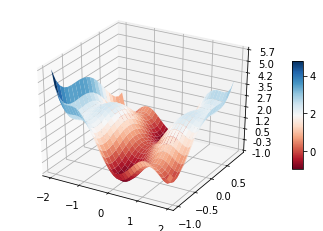

In [17]:
#Plot of the function
x=np.arange(-2,2, 0.1)
y=np.arange(-1,1, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f12(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

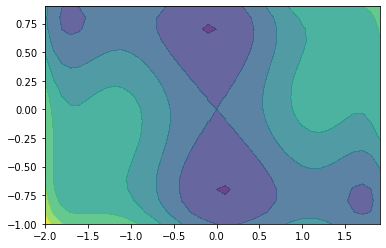

In [18]:
#Countour plot
fig, ax = plt.subplots()
ax.contourf(X, Y, Z, alpha= .8)

plt.show()

Note that this function has several local minimums, and therefore the descend algorithm may converge on different minimums depending on the initial value taken.

#### 1. Let's follow the gradient descent with 100 iterations at different starting points.

In [19]:
def grad12(x,y):
    return np.array([2*x*(4-2.1*x**2 + (1/3)*x**4) + x**2*(-2*2.1*x + (4/3)*x**3)+y,
                     x+2*y*(-4+4*y**2) + 8*y**3])
#Function that computes gradient descent for the above function for a given initial point and number of steps
def gradDescent12( x0, steps, alpha = 0.1):
    x_path=np.zeros(steps)
    y_path=np.zeros(steps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    for i in range(1,steps):
        x_k = x_0-alpha*grad12(x_0[0],x_0[1])
        x_0 = x_k
        x_path[i]=x_k[0]
        y_path[i]=x_k[1]
    return x_path, y_path
#Function that plots the path of gradient descent for the above function for a given initial point and number of steps
def plotGrad12(x0, steps, alpha=0.1):
    x_path, y_path = gradDescent12(x0, steps, alpha)
    plotGradients(x0, steps, x_path, y_path,f=f12, alpha=0.1)

-0.08984201310031804 0.7126564030207397


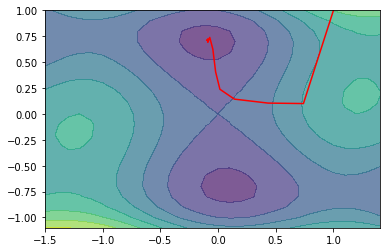

In [20]:
plotGrad12([1,1], 100)

-0.08984201310031804 0.7126564030207397


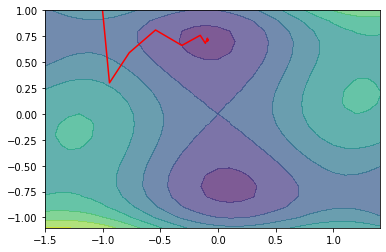

In [21]:
plotGrad12([-1,1], 100)

-0.08984201310031807 0.7126564030207395


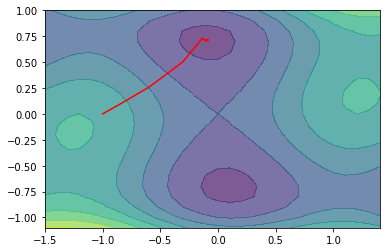

In [22]:
plotGrad12([-1,0], 100)

0.08984201310031804 -0.7126564030207397


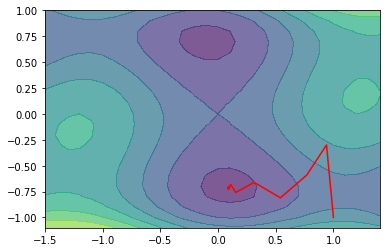

In [23]:
plotGrad12([1,-1], 100)

0.08984201310031804 -0.7126564030207397


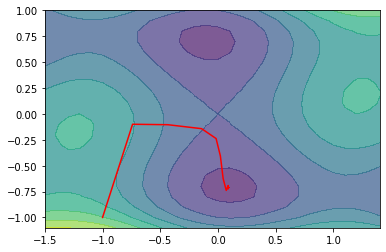

In [24]:
plotGrad12([-1,-1], 100)

Note that the algorithm usually converges to the minimum located in the valley to which x0 belongs.

#### 2. Gradient descent with adaptable step size.

Let's consider the double loop procedure to perform the gradient descent adapting the value of the step size:

In [25]:
#Double loop procedure function for f12
def doubleloop12(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    alpha=1
    for i in range(1,100):
      x_k=x_0-alpha*grad12(x_0[0],x_0[1])
      while f12(x_k[0],x_k[1])>f12(x_0[0],x_0[1]):
        alpha=alpha/2
        x_k=x_0-alpha*grad12(x_0[0],x_0[1])
      if f12(x_k[0],x_k[1])<f12(x_0[0],x_0[1]):
        if abs(f12(x_k[0], x_k[1]) - f12(x_0[0], x_0[1])) < thres:
          return x_path[0:i], y_path[0:i], i
        else:
          x_0 = x_k
      x_path[i]=x_k[0]
      y_path[i]=x_k[1]
        
    return x_path, y_path,i

In [26]:
#Function to plot the path of gradient descent with points in every step
def plotGradients_withScatter(x0, x_path, y_path, iteration, f=f, alpha=0.1):
    x_limit = x0[0]
    y_limit= x0[1]
    for i in range(len(x_path)):
        if x_limit < x_path[i]:
            x_limit = x_path[i]
        if y_limit < y_path[i]:
            y_limit = y_path[i]
    if abs(x_limit) <1.2 and abs(y_limit) < 1.2:
        x=np.arange(-1.5,1.5, 0.1)
        y=np.arange(-1.1,1.1, 0.1)
    elif abs(x_limit) <1.2:
        x=np.arange(-1.5,1.5, 0.1)
        y=np.arange(-abs(y_limit)-0.1,abs(y_limit)+0.1, 0.1)
    elif abs(y_limit) < 1.2:
        x=np.arange(-abs(x_limit)-0.1,abs(x_limit)+0.1, 0.1)
        y=np.arange(-1.1,1.1, 0.1)
    else: 
        x=np.arange(-abs(x_limit) -0.1,abs(x_limit)+0.1, 0.1)
        y=np.arange(-abs(y_limit)-0.1,abs(y_limit)+0.1, 0.1)
    X, Y = pylab.meshgrid(x,y)
    X, Y = pylab.meshgrid(x,y)
    Z= f(X,Y)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    for i in range(0,iteration):
        plt.scatter(x_path[i],y_path[i], color='hotpink')
    print(x_path[-1], y_path[-1])
    print('The method has converged after '+str(iteration-1)+ ' iterations.\n')

def plotDoubleLoop12(x0, thres, maxSteps=100):
    x_path, y_path,iteration = doubleloop12(x0, thres, maxSteps)
    plotGradients_withScatter(x0, x_path, y_path, iteration, f=f12, alpha=0.1)

0.08772143909071128 -0.7034196139099396
The method has converged after 5 iterations.



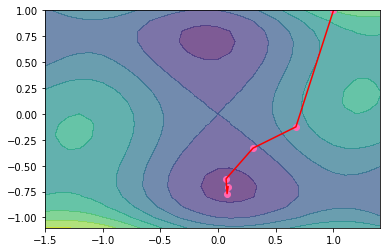

In [27]:
plotDoubleLoop12([1,1], thres= 1e-3)

-0.1028573572882394 0.7141285091016496
The method has converged after 11 iterations.



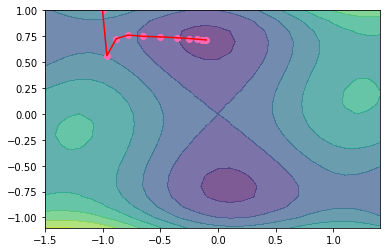

In [28]:
plotDoubleLoop12([-1,1], thres= 1e-3)

0.08396862093227253 -0.7016744125012935
The method has converged after 7 iterations.



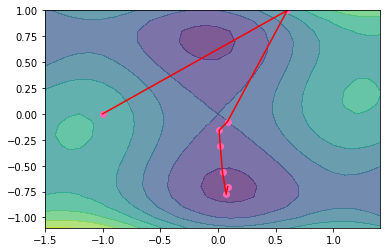

In [29]:
plotDoubleLoop12([-1,0], thres= 1e-3)

0.1028573572882394 -0.7141285091016496
The method has converged after 11 iterations.



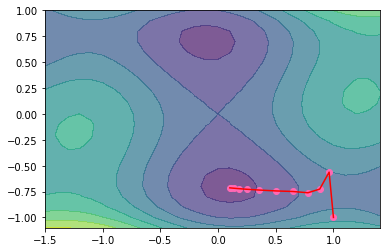

In [30]:
plotDoubleLoop12([1,-1], thres= 1e-3)

-0.08772143909071128 0.7034196139099396
The method has converged after 5 iterations.



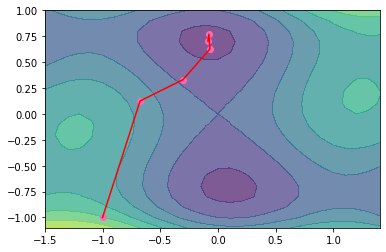

In [31]:
plotDoubleLoop12([-1,-1], thres= 1e-3)

The method is really fast, we do not need even 15 iterations to convergence in most of the cases. The algorithm is superior compared to those presented before.

### 1.3 The Rosenbrock function

The Rosenbrock function is $f(x_1,x_2)=(a-x_1)^2+b(x_2-x_1^2)^2$. It turns out that the function has a global minimum at $(x_1^*,x_2^*)=(a,a^2)$, where $f(x_1^*,x_2^*)=(0,0)$. The global minimum
is inside a long, very narrow, parabolic shaped valley.

#### 1. Plot the contours of the Rosenbrock function for $a = 1$ and $b = 100$.

In [32]:
def fR(x,y,a=1,b=100):
    return (a-x)**2 + b*(y-x**2)**2

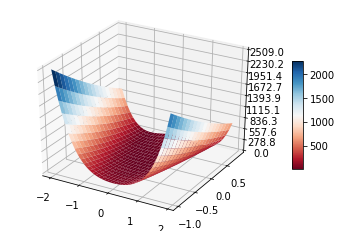

In [33]:
x=np.arange(-2,2, 0.1)
y=np.arange(-1,1, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= fR(X,Y,1,100)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

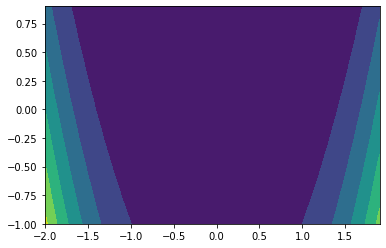

In [34]:
#Contour plot
fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

The gradient of the function is the following

In [35]:
def grad_fR(x,y,a,b):
    return np.array([-2*(a-x)-2*b*(y-x**2)*2*x,2*b*(y-x**2)])

#### 2. Check the robustness of the backtracking descent algorithm you have implemented.

Let us do the algorithm implemented above from different initial points to see if the method works. 

In [36]:
#Double procedure function for fR
def doubleloop_R(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    alpha=1
    for i in range(1,100):
      x_k=x_0-alpha*grad_fR(x_0[0],x_0[1],1,100)
      while fR(x_k[0],x_k[1],1,100)>fR(x_0[0],x_0[1],1,100):
        alpha=alpha/2
        x_k=x_0-alpha*grad_fR(x_0[0],x_0[1],1,100)
      if fR(x_k[0],x_k[1],1,100)<fR(x_0[0],x_0[1],1,100):
        if abs(fR(x_k[0], x_k[1],1,100) - fR(x_0[0], x_0[1],1,100)) < thres:
          return x_path[0:i], y_path[0:i], i
        else:
            x_0 = x_k
      x_path[i]=x_k[0]
      y_path[i]=x_k[1]

        
    return x_path, y_path,i

In [37]:
#Plot of the gradient descent path for fR function
def plotDoubleLoop_R(x0, thres, maxSteps=100):
    x_path, y_path,iteration = doubleloop_R(x0, thres, maxSteps)
    plotGradients_withScatter(x0, x_path, y_path, iteration, f=fR, alpha=0.1)

0.4368205302269214 0.18801205198897492
The method has converged after 98 iterations.



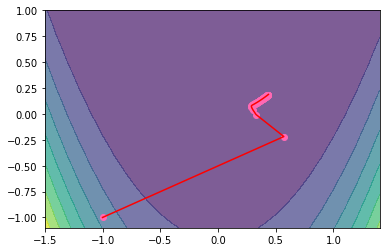

In [38]:
plotDoubleLoop_R([-1,-1], thres= 1e-3)

-0.8955755540164249 0.81012229127524
The method has converged after 98 iterations.



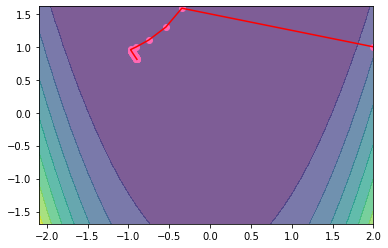

In [39]:
plotDoubleLoop_R([2,1], thres= 1e-3)

0.9845316190472347 0.9703445150367255
The method has converged after 3 iterations.



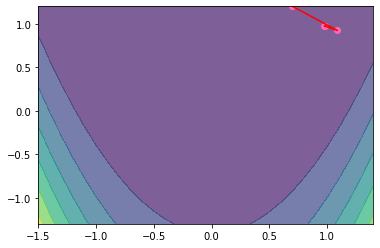

In [40]:
plotDoubleLoop_R([0.7,1.2], thres= 1e-3)

0.5223581513407427 0.27046446692426424
The method has converged after 98 iterations.



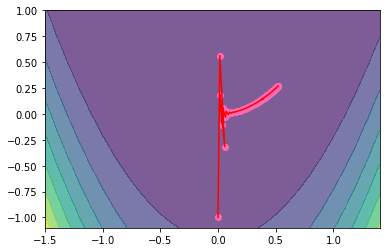

In [41]:
plotDoubleLoop_R([0,-1], thres= 1e-3)

Note that the method is not working in most of the cases. Let us modify the criterion (by putting lower thresholds, for instance) to see if it is able to find the minimum

1.2404268810115051 1.5394926588572426
The method has converged after 98 iterations.



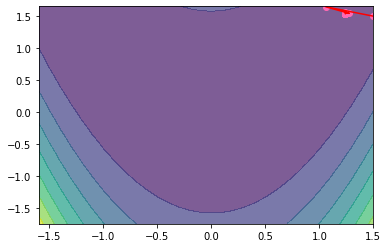

In [42]:
plotDoubleLoop_R([1.5,1.5], thres= 1e-6)

0.4368205302269214 0.18801205198897492
The method has converged after 98 iterations.



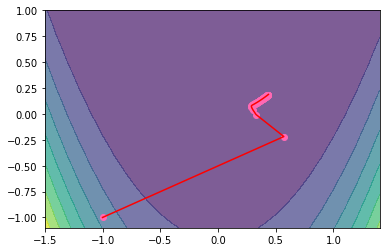

In [43]:
plotDoubleLoop_R([-1,-1], thres= 1e-6)

Notice that even putting lower thresholds, we are not able to find the minimum. Let us prove to change the condition and check $||\nabla f(x_k)||<10^{-6}$.

In [44]:
#Double procedure function for fR changing the stop criterion
def doubleloop_R_mod(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    alpha=1
    for i in range(1,100):
      x_k=x_0-alpha*grad_fR(x_0[0],x_0[1],1,100)
      while fR(x_k[0],x_k[1],1,100)>fR(x_0[0],x_0[1],1,100):
        alpha=alpha/2
        x_k=x_0-alpha*grad_fR(x_0[0],x_0[1],1,100)
      if fR(x_k[0],x_k[1],1,100)<fR(x_0[0],x_0[1],1,100):
        if abs(grad_fR(x_k[0],x_k[1])) < thres:
          return x_path[0:i], y_path[0:i], i
        else:
            x_0 = x_k
      x_path[i]=x_k[0]
      y_path[i]=x_k[1]

        
    return x_path, y_path,i

In [45]:
#Plot of the gradient descent path for fR function
def plotDoubleLoop_R_mod(x0, thres, maxSteps=100):
    x_path, y_path,iteration = doubleloop_R(x0, thres, maxSteps)
    plotGradients_withScatter(x0, x_path, y_path, iteration, f=fR, alpha=0.1)

-0.537688855619398 0.29678119468944764
The method has converged after 98 iterations.



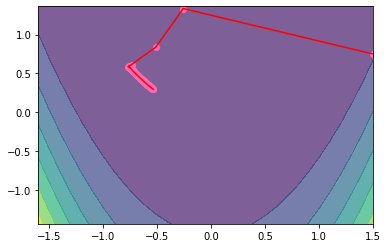

In [46]:
plotDoubleLoop_R_mod([1.5,0.75], thres= 1e-6)

0.4368205302269214 0.18801205198897492
The method has converged after 98 iterations.



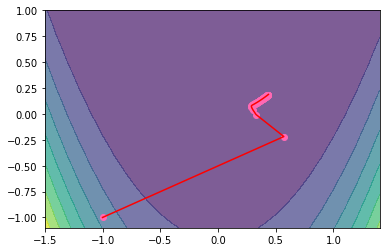

In [47]:
plotDoubleLoop_R([-1,-1], thres= 1e-6)

Even with that, we are not able to find the minimum. The method, with 100 maximum iterations, is not working for this function. 

### **2.Newton descent methods**

### 2.1 A simple quadratic function

We begin by focusing on a simple two-dimensional quadratic function.  Concretely $f(x_1,x_2)=100x_1^2+x_2^2$

#### 1.  Minimize the previous function using the gradient descent algorithm.

In [48]:
def fQ(x,y):
  return 100*x**2+y**2

In [49]:
def grad_fQ(x,y):
  return np.array([200*x,2*y])

Let us plot the function to visualize where we have the minimum.

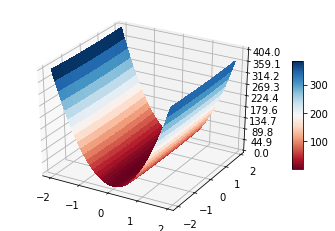

In [50]:
#Plot of the function
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib import cm
import pylab

x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= fQ(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

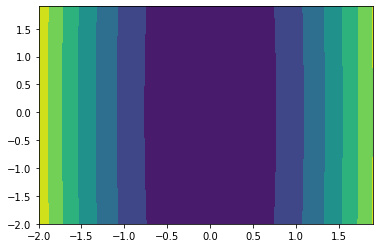

In [51]:
#Contour plot
fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

Notice that we have a minimum in $(0,0)$, but notice that near that point the plot seems flat, so we are close to have a line of points that reach the minimum. This can be a problem to arrive to the real minimum since the algorithm can stop when we actually it is not as close as we want. Let us compute the gradient descent method. We are going to use backtracking algorithm.

In [52]:
#Double loop procedure function for fQ
def doubleloop_Q(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    alpha=1
    for i in range(1,100):
      x_k=x_0-alpha*grad_fQ(x_0[0],x_0[1])
      while fQ(x_k[0],x_k[1])>fQ(x_0[0],x_0[1]):
        alpha=alpha/2
        x_k=x_0-alpha*grad_fQ(x_0[0],x_0[1])
      if fQ(x_k[0],x_k[1])<fQ(x_0[0],x_0[1]):
        if abs(fQ(x_k[0], x_k[1]) - fQ(x_0[0], x_0[1])) < thres:
          return x_path[0:i], y_path[0:i], i
        else:
            x_0 = x_k
      x_path[i]=x_k[0]
      y_path[i]=x_k[1]
        
    return x_path, y_path,i

In [53]:
#Function to plot the path of gradient descent with points in every step
def plotDoubleLoop_Q(x0, thres, maxSteps=100):
    x_path, y_path,iteration = doubleloop_Q(x0, thres, maxSteps)
    plotGradients_withScatter(x0, x_path, y_path, iteration, f=fQ, alpha=0.1)

1.610856196490441e-17 0.17683490169971539
The method has converged after 66 iterations.



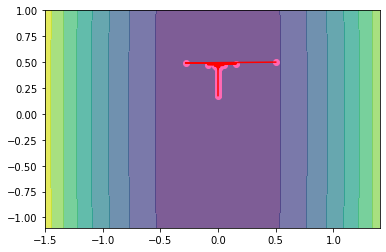

In [54]:
plotDoubleLoop_Q([0.5,0.5],1e-3)

-1.82864815251838e-25 0.21032794156281348
The method has converged after 98 iterations.



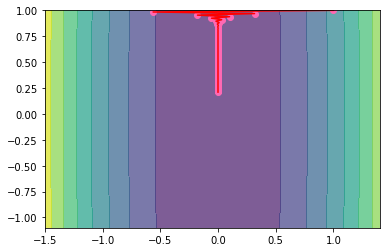

In [55]:
plotDoubleLoop_Q([1,1],1e-3)

-0.0031712119389339932 0.0
The method has converged after 10 iterations.



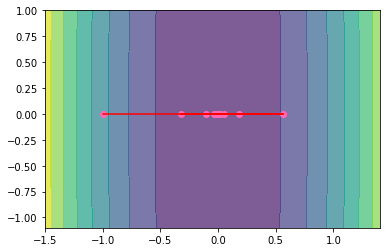

In [56]:
plotDoubleLoop_Q([-1,0],1e-3)

-1.610856196490441e-17 -0.17683490169971539
The method has converged after 66 iterations.



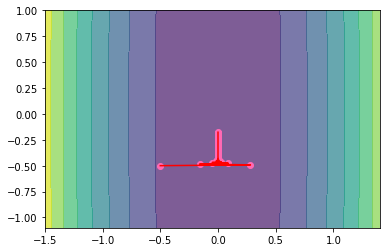

In [57]:
plotDoubleLoop_Q([-0.5,-0.5],1e-3)

Clearly, the minimum is in $(0,0)$. After some iterations, we reach the point

#### 2.   minimize the previous function using the Newton method

Let us compute the Hessian matrix first and compute Newton method

In [58]:
A=np.zeros((2,2))#hessian matrix
A[0,0]=200
A[1,0]=0
A[0,1]=0
A[1,1]=2
#Newton's method
def Newton(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    alpha=1 
    for i in range(1,100):
      d_k=np.linalg.solve(A,-grad_fQ(x_0[0],x_0[1]))
      x_k=x_0+alpha*d_k
      while fQ(x_k[0],x_k[1])>fQ(x_0[0],x_0[1]):
        alpha=alpha/2
        x_k=x_0+alpha*d_k
      if fQ(x_k[0],x_k[1])<=fQ(x_0[0],x_0[1]):
        if abs(fQ(x_k[0], x_k[1]) - fQ(x_0[0], x_0[1])) < thres:
          return x_path[0:i], y_path[0:i], i
        else:
            x_0 = x_k
      x_path[i]=x_k[0]
      y_path[i]=x_k[1]
        
    return x_path, y_path,i

In [61]:
#Plot of Newton's method path with points in every step
def plotDoubleLoop_Newton(x0, thres, maxSteps=100):
    x_path, y_path,iteration =Newton(x0, thres, maxSteps)
    plotGradients_withScatter(x0, x_path, y_path, iteration, f=fQ, alpha=0.1)

0.0 0.0
The method has converged after 1 iterations.



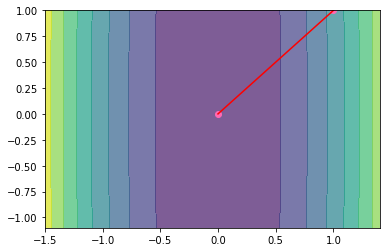

In [63]:
plotDoubleLoop_Newton([1,1],1e-3)

0.0 0.0
The method has converged after 1 iterations.



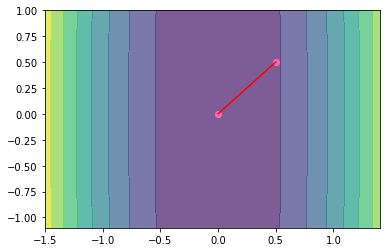

In [64]:
plotDoubleLoop_Newton([0.5,0.5],1e-3)

0.0 0.0
The method has converged after 1 iterations.



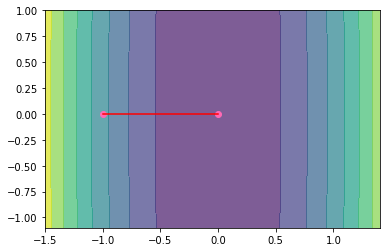

In [65]:
plotDoubleLoop_Newton([-1,0],1e-3)

0.0 0.0
The method has converged after 1 iterations.



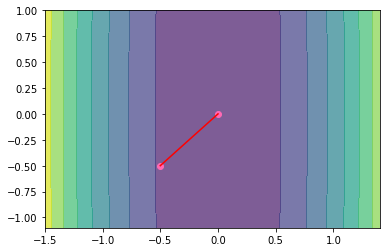

In [66]:
plotDoubleLoop_Newton([-0.5,-0.5],1e-3)

Notice that the Newton method converge to the minimum faster than the gradient descent method. Actually, since we have a parabola and the Hessian does not depend on the point you are evaluating, choosing $\alpha^0=1$, we always need one iteration to arrive at the minimum! There were points on the other method that 100 iterations were needed!!

### 2.2 A function with multiple minima

Consider the function studied in section 1.2.
\begin{align*}
f(x_1, x_2) = f(\mathbf{x}) = x_1^2(4-2.1x_1^2 + \frac{1}{3}x_1^4) + x_1 x_2 + x_2^2(-4 + 4x_2^2).
\end{align*}

#### 1.Recover the experiments you performed in the previous sections. take an initial point $x^0$ “far away” from a minimum and compute the number of iterations that are needed to get to the minimum.

Let us study all of the methods that we have just studied excepet Newton method, that it will be studied later. First of all, the gradient descent method.

-0.08984201310031804 0.7126564030207397


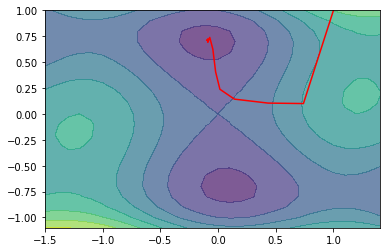

In [67]:
plotGrad12([1,1], 100)

-0.08984201310031804 0.7126564030207397


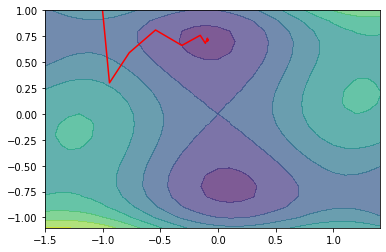

In [68]:
plotGrad12([-1,1], 100)

-0.08984201310031807 0.7126564030207395


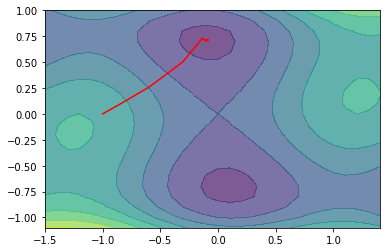

In [69]:
plotGrad12([-1,0], 100)

0.08984201310031804 -0.7126564030207397


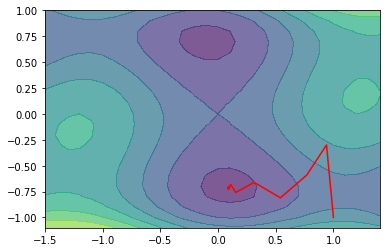

In [70]:
plotGrad12([1,-1], 100)

0.08984201310031804 -0.7126564030207397


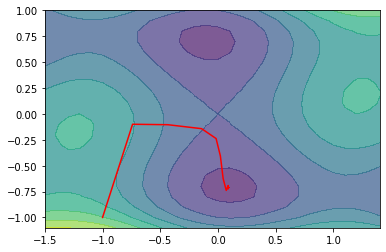

In [71]:
plotGrad12([-1,-1], 100)

Now the gradient descent method with double loop procedure.

0.08772143909071128 -0.7034196139099396
The method has converged after 5 iterations.



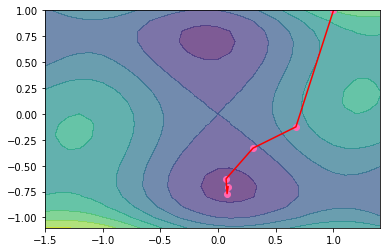

In [72]:
plotDoubleLoop12([1,1], thres= 1e-3)

-0.1028573572882394 0.7141285091016496
The method has converged after 11 iterations.



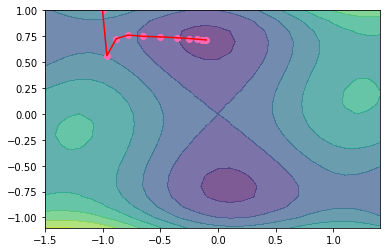

In [73]:
plotDoubleLoop12([-1,1], thres= 1e-3)

0.08396862093227253 -0.7016744125012935
The method has converged after 7 iterations.



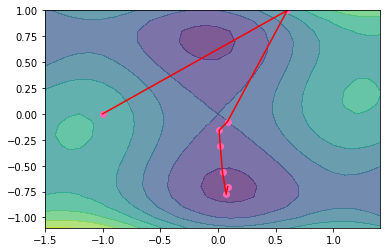

In [74]:
plotDoubleLoop12([-1,0], thres= 1e-3)

0.1028573572882394 -0.7141285091016496
The method has converged after 11 iterations.



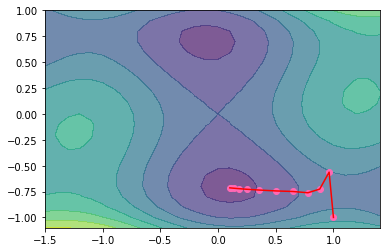

In [75]:
plotDoubleLoop12([1,-1], thres= 1e-3)

-0.08772143909071128 0.7034196139099396
The method has converged after 5 iterations.



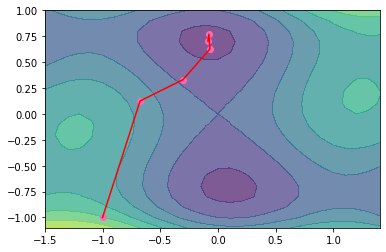

In [76]:
plotDoubleLoop12([-1,-1], thres= 1e-3)

Notice that both methods works good, but the gradient descent method without loop procedure requiere more iterations. What happen if we try to put the same number of iterations that Newton's method need to achieve the minimum with the gradient descent method without loop procedure?

0.016511915975415653 0.23801294570219578


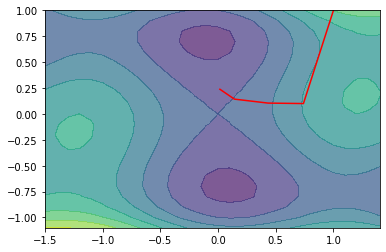

In [82]:
plotGrad12([1,1], 5)

-0.09044404058823524 0.7074084937853407


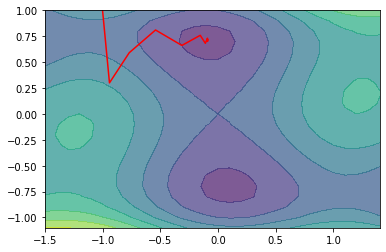

In [83]:
plotGrad12([-1,1], 11)

-0.09166096778994273 0.719458707492929


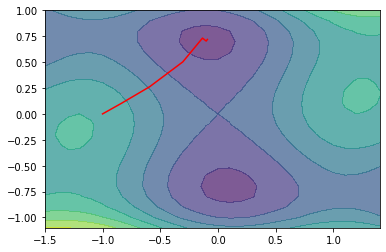

In [84]:
plotGrad12([-1,0], 7)

0.09044404058823524 -0.7074084937853407


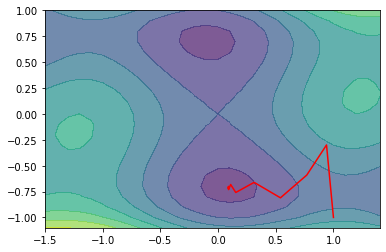

In [87]:
plotGrad12([1,-1], 11)

-0.016511915975415653 -0.23801294570219578


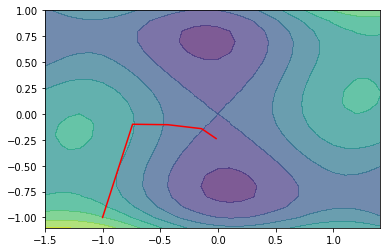

In [86]:
plotGrad12([-1,-1], 5)

Notice that fore example in the cases $x^0=(1,1)$ and $x^0=(-1,-1)$ the method performs much worse.

#### 2. Newton method using  gradient descent in case the Hessian at iteration $x^k$ is not positive definite.

Let us compute the Hessian matrix of the function $f12$ defined before. The matrix is given by

\begin{pmatrix}
2(4-12.6x^2+5x^4) & 1 \\ 1 & 8 (-1 + 6y^2)
\end{pmatrix}

In [89]:
#Analytical functions that we need
def f12(x,y):
    return x**2*(4-2.1*x**2 + (1/3)*x**4) + x*y + y**2*(-4+4*y**2)
def grad12(x,y):
    return np.array([2*x*(4-2.1*x**2 + (1/3)*x**4) + x**2*(-2*2.1*x + (4/3)*x**3)+y,
                     x+2*y*(-4+4*y**2) + 8*y**3])
def second_dif_x(x):
  #it only depends at the first coordinate of the point (x,y)
  return 2*(4-2.1*x**2+(1/3)*x**4) + 4*x*(-2*2.1*x+(4/3)*x**3) + (x**2)*(-2*2.1+4*x**2)
def second_dif_y(y):
  # it only depends at the second coordinate of the point (x,y)
  return 2*(-4+4*y**2)+40*y**2
def Hess(x,y):
  A=np.zeros((2,2))
  A[1,0]=1
  A[0,1]=1
  A[0,0]=second_dif_x(x)
  A[1,1]=second_dif_y(y)
  return A

In [94]:
#Combined gradient-Newton method
def gradient_Newton(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]

    indicador = np.zeros((len(x_path)))
    #Indicador will be 0 when the Hessian is not positive definite, and 1 if is positive definite
    #This is to distinct which method we are doing in every step
    x_0 = x0
    alpha=1
    for i in range(1,100):
      v=np.linalg.eig(Hess(x_0[0],x_0[1]))[0]
      if v[0]>0 and v[1]>0:#The hessian is positive definite --> Newton's method
        indicador[i] = 1
        d_k=np.linalg.solve(Hess(x_0[0],x_0[1]),-grad12(x_0[0],x_0[1]))
        x_k=x_0+alpha*d_k
        while f12(x_k[0],x_k[1])>f12(x_0[0],x_0[1]):
          alpha=alpha/2
          x_k=x_0+alpha*d_k
        if f12(x_k[0],x_k[1])<f12(x_0[0],x_0[1]):
          if abs(f12(x_k[0], x_k[1]) - f12(x_0[0], x_0[1])) < thres:
            return x_path[0:i], y_path[0:i], i,indicador[0:i]
          else:
              x_0 = x_k
      else:#The hessian is not positive definite --> Gradient descent
         x_k=x_0-alpha*grad12(x_0[0],x_0[1])
         while f12(x_k[0],x_k[1])>f12(x_0[0],x_0[1]):
          alpha=alpha/2
          x_k=x_0-alpha*grad12(x_0[0],x_0[1])
         if f12(x_k[0],x_k[1])<f12(x_0[0],x_0[1]):
          if abs(f12(x_k[0], x_k[1]) - f12(x_0[0], x_0[1])) < thres:
            return x_path[0:i], y_path[0:i], i,indicador[0:i]
          else:
            x_0 = x_k

      x_path[i]=x_k[0]
      y_path[i]=x_k[1]
        
    return x_path, y_path,i,indicador

In [96]:
#Function to plot the path of the combined method by colors, red for Newton's method and blue for Gradient descent method
import pandas as pd
def plotGradients_combined(x0, x_path, y_path, iteration, indicador, f=f12):
    x_limit = x0[0]
    y_limit= x0[1]
    for i in range(len(x_path)):
        if x_limit < x_path[i]:
            x_limit = x_path[i]
        if y_limit < y_path[i]:
            y_limit = y_path[i]
    if abs(x_limit) <1.2 and abs(y_limit) < 1.2:
        x=np.arange(-1.5,1.5, 0.1)
        y=np.arange(-1.1,1.1, 0.1)
    elif abs(x_limit) <1.2:
        x=np.arange(-1.5,1.5, 0.1)
        y=np.arange(-abs(y_limit)-0.1,abs(y_limit)+0.1, 0.1)
    elif abs(y_limit) < 1.2:
        x=np.arange(-abs(x_limit)-0.1,abs(x_limit)+0.1, 0.1)
        y=np.arange(-1.1,1.1, 0.1)
    else: 
        x=np.arange(-abs(x_limit) -0.1,abs(x_limit)+0.1, 0.1)
        y=np.arange(-abs(y_limit)-0.1,abs(y_limit)+0.1, 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f(X,Y)
    plt.contourf(X, Y, Z, alpha= .7)
    df = pd.DataFrame({
        'points_x': x_path, 
        'points_y': y_path,
        'grouping': indicador 
    })
    df.set_index('points_x',inplace=True)
    df.groupby('grouping')['points_y'].plot()
    for i in range(0,iteration):
      if(indicador[i]==0):
        plt.scatter(x_path[i],y_path[i],color='b')
      else: 
        plt.scatter(x_path[i],y_path[i], color='r')
    print(x_path[-1],y_path[-1])
    print('The method has converged after '+str(iteration)+ ' iterations.\n')

def plot_combinedmethod(x0, thres, maxSteps=100):
    x_path, y_path,iteration,indicador =gradient_Newton(x0, thres, maxSteps)
    plotGradients_combined(x0, x_path, y_path, iteration, indicador, f=f12)
    

We will plot the path that the method follows. In color blue, the gradient descent method and in color red the Newton's method. We also draw points in every step of the method. Notice that ''near'' the minimum, the Newton method is mostly used.

0.08436838596666918 -0.6907975903349821
The method has converged after 13 iterations.



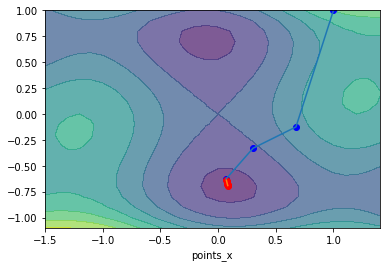

In [103]:
plot_combinedmethod([1,1], 1e-3, maxSteps=100)

Let us draw more examples.

-0.133798379443127 0.716580899969949
The method has converged after 35 iterations.



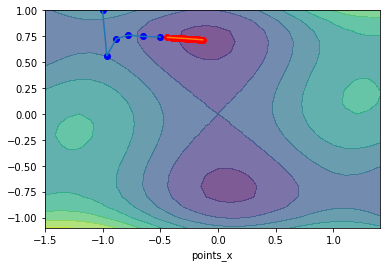

In [104]:
plot_combinedmethod([-1,1], 1e-3, maxSteps=100)

0.133798379443127 -0.716580899969949
The method has converged after 35 iterations.



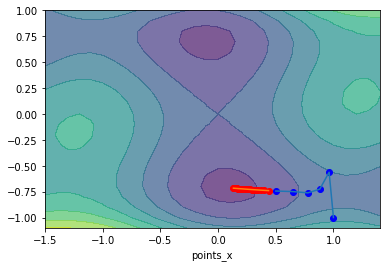

In [106]:
plot_combinedmethod([1,-1], 1e-3, maxSteps=100)

-0.08436838596666918 0.6907975903349821
The method has converged after 13 iterations.



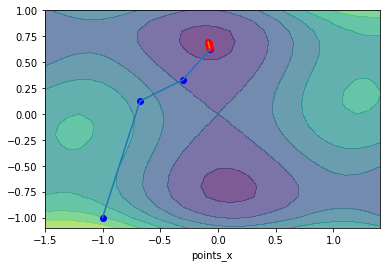

In [105]:
plot_combinedmethod([-1,-1], 1e-3, maxSteps=100)

#### 3. Compare the Newton method with the classical gradient descent for this function

Let us recover the results from the gradient descent method programmed previously:

0.08772143909071128 -0.7034196139099396
The method has converged after 5 iterations.



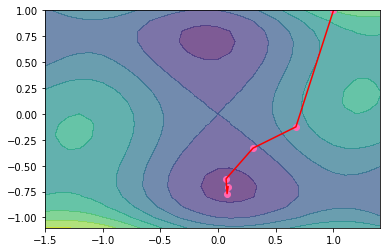

In [107]:
plotDoubleLoop12([1,1], thres= 1e-3)

-0.1028573572882394 0.7141285091016496
The method has converged after 11 iterations.



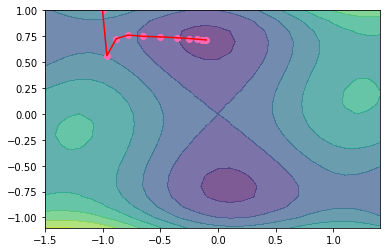

In [110]:
plotDoubleLoop12([-1,1], thres= 1e-3)

0.1028573572882394 -0.7141285091016496
The method has converged after 11 iterations.



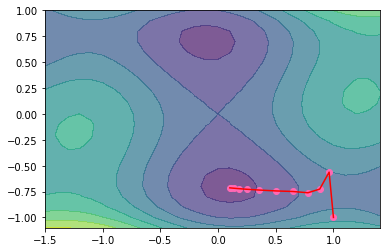

In [111]:
plotDoubleLoop12([1,-1], thres= 1e-3)

-0.08772143909071128 0.7034196139099396
The method has converged after 5 iterations.



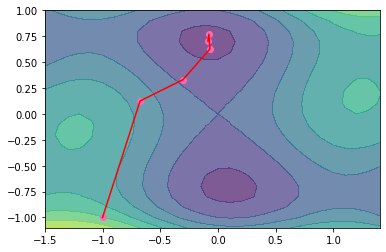

In [112]:
plotDoubleLoop12([-1,-1], thres= 1e-3)

Let us program the Newton method for this function and compare the results.

In [113]:
#Newton's method for the function f12
def Newton_f(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    alpha=1
    for i in range(1,100):
      d_k=np.linalg.solve(Hess(x_0[0],x_0[1]),-grad12(x_0[0],x_0[1]))
      x_k=x_0+alpha*d_k
      while f12(x_k[0],x_k[1])>f12(x_0[0],x_0[1]):
        alpha=alpha/2
        x_k=x_0+alpha*d_k
      if f12(x_k[0],x_k[1])<f12(x_0[0],x_0[1]):
        if abs(f12(x_k[0], x_k[1]) - f12(x_0[0], x_0[1])) < thres:
          return x_path[0:i], y_path[0:i], i
        else:
            x_0 = x_k
      x_path[i]=x_k[0]
      y_path[i]=x_k[1]
        
    return x_path, y_path,i

In [114]:
#Plot of the path of Newton's method with points in every step
def plotDoubleLoop_Newton_f(x0, thres, maxSteps=100):
    x_path, y_path,iteration =Newton_f(x0, thres, maxSteps)
    plotGradients_withScatter(x0, x_path, y_path, iteration, f=f12)

1.2968030581649472 0.609839600585016
The method has converged after 3 iterations.



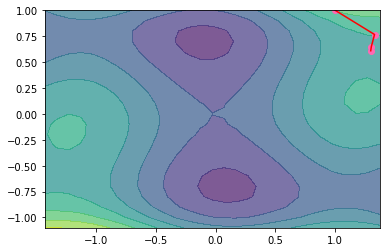

In [115]:
plotDoubleLoop_Newton_f([1,1],1e-3)

1.2968030581649472 0.609839600585016
The method has converged after 3 iterations.



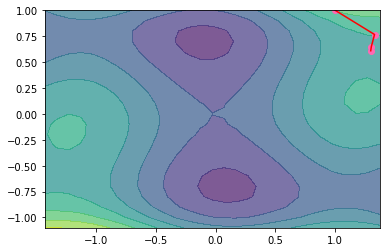

In [116]:
plotDoubleLoop_Newton_f([1,1],1e-3)

-1.1085097315256582 0.7737413665640921
The method has converged after 2 iterations.



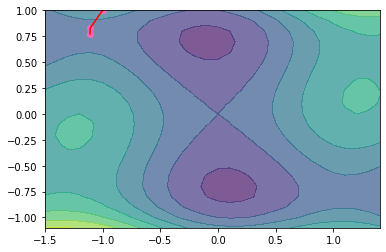

In [117]:
plotDoubleLoop_Newton_f([-1,1],1e-3)

1.1085097315256582 -0.7737413665640921
The method has converged after 2 iterations.



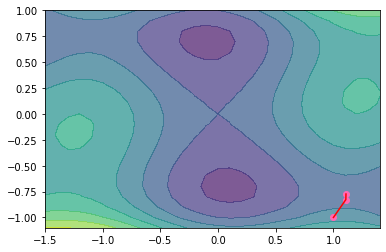

In [118]:
plotDoubleLoop_Newton_f([1,-1],1e-3)

-1.2968030581649472 -0.609839600585016
The method has converged after 3 iterations.



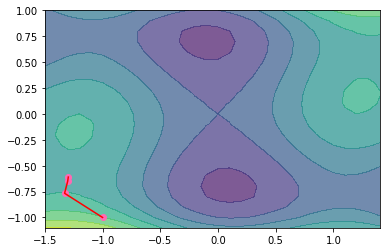

In [119]:
plotDoubleLoop_Newton_f([-1,-1],1e-3)

The method is not converging to the minimum, is converging to saddle points since we are not so close to them. Let us try to change the initial conditions. For example, for $x^0=(0,-0.5)$ the Newton's method converges to a minimum and it needs 4 iterations while gradient descent need only 2 iterations. We conclude here that Newton's method is not as functional as gradient descent in that case.

0.08680653813195778 -0.7206309501758517
The method has converged after 4 iterations.



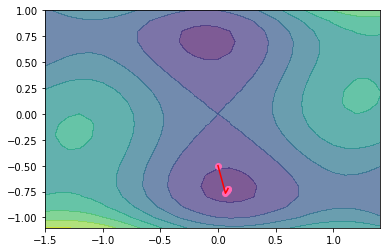

In [120]:
plotDoubleLoop_Newton_f([0,-0.5],1e-3)

0.07825305461883544 -0.70703125
The method has converged after 2 iterations.



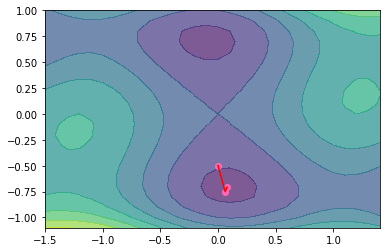

In [121]:
plotDoubleLoop12([0,-0.5], thres= 1e-3)

### 2.3 The Rosenbrock function

Remember that we have seen  that many iterations of the gradient descent were required to reach the minimum (in case the algorithm converged). Let us see how the Newton method performs here.

In [123]:
#Analytical functions
def fR(x,y,a=1,b=100):
  return (a-x)**2 + b*(y-x**2)**2
def grad_fR(x,y,a=1,b=100):
  return np.array([-2*(a-x)-2*b*(y-x**2)*2*x,2*b*(y-x**2)])
def Hess_fR(x,y,a=1,b=100):
  A=np.zeros((2,2))
  A[0,0]=2-4*b*y+12*b*x**2
  A[1,0]=-4*b*x
  A[0,1]=-4*b*x
  A[1,1]=2*b
  return A

Let us recover the methods implemented on section *1.3* of this Notebook to see how gradient descent works. You will see that in most of the cases, the method was not converging. Let us use the combined Newton-gradient descent method and see how many iterations are required to arrive to the minimum.

In [125]:
#Combined Newton-gradient descent method
def gradient_Newton_fR(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]

    indicador = np.zeros((len(x_path)))
    '''
        Indicador will be 0 when the Hessian is not positive definite,
        and therefore we apply the gradient descent method; and indicador
        may be 1 when the Hessian is positive definite, in which case
        we may use the Newton direction method
    '''  
    
    x_0 = x0
    alpha=1
    for i in range(1,100):
      v=np.linalg.eig(Hess_fR(x_0[0],x_0[1]))[0]
      if v[0]>0 and v[1]>0:#The hessian is positive definite --> Newton's method
        indicador[i] = 1
        d_k=np.linalg.solve(Hess_fR(x_0[0],x_0[1]),-grad_fR(x_0[0],x_0[1]))
        x_k=x_0+alpha*d_k
        while fR(x_k[0],x_k[1])>fR(x_0[0],x_0[1]):
          alpha=alpha/2
          x_k=x_0+alpha*d_k
        if fR(x_k[0],x_k[1])<fR(x_0[0],x_0[1]):
          if abs(fR(x_k[0], x_k[1]) - fR(x_0[0], x_0[1])) < thres:
            return x_path[0:i], y_path[0:i], i,indicador[0:i]
          else:
              x_0 = x_k
      else:#The hessian is not positive definite --> Gradient descent method
         x_k=x_0-alpha*grad_fR(x_0[0],x_0[1])
         while fR(x_k[0],x_k[1])>fR(x_0[0],x_0[1]):
          alpha=alpha/2
          x_k=x_0-alpha*grad_fR(x_0[0],x_0[1])
         if fR(x_k[0],x_k[1])<fR(x_0[0],x_0[1]):
          if abs(fR(x_k[0], x_k[1]) - fR(x_0[0], x_0[1])) < thres:
            return x_path[0:i], y_path[0:i], i,indicador[0:i]
          else:
            x_0 = x_k

      x_path[i]=x_k[0]
      y_path[i]=x_k[1]
        
    return x_path, y_path,i,indicador

In [127]:
#Plot of the combined method. Red color for Newton and blue for gradient descent
import pandas as pd
def plot_combinedmethod_fR(x0, thres, maxSteps=100):
    x_path, y_path,iteration,indicador =gradient_Newton_fR(x0, thres, maxSteps)
    plotGradients_combined(x0, x_path, y_path, iteration, indicador, f=fR)

1.0466362202089514 1.0941320110634385
The method has converged after 18 iterations.



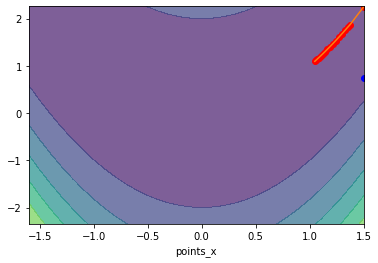

In [133]:
plot_combinedmethod_fR([1.5,0.75],1e-3)

1.0515097017667434 1.1042350718510936
The method has converged after 28 iterations.



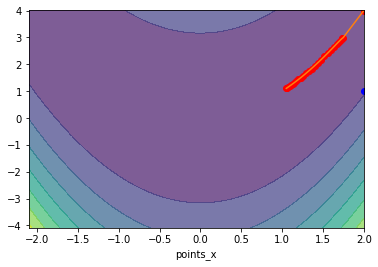

In [129]:
plot_combinedmethod_fR([2,1],1e-3)

1.0462081564218124 1.0932472792174548
The method has converged after 18 iterations.



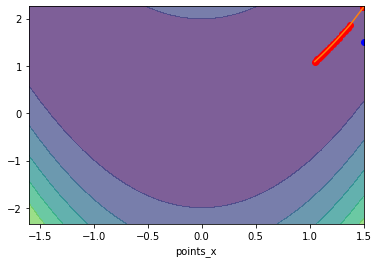

In [130]:
plot_combinedmethod_fR([1.5,1.5],1e-3)

Note that the combined Newton method starts applying the gradient descent method in order to choose the algrithm direction at the beggining. However, eventually it starts computing the Newton direction, due to the fact that we get closer to the point and therefore the Hessian is defined positive. This combined method works!